In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def make_geojson_from_bins (bin_counts, xedges, yedges):
    
    def make_polygon_coords (xcenter, ycenter, xdelta, ydelta):
        return [[
            [xcenter - xdelta, ycenter - ydelta],
            [xcenter + xdelta, ycenter - ydelta],
            [xcenter + xdelta, ycenter + ydelta],
            [xcenter - xdelta, ycenter + ydelta],
            [xcenter - xdelta, ycenter - ydelta]
        ]]
    """
    Using the output from numpy.histogram2d, create a geoJSON with geometry features of Polygons
    and properties features of the bin_counts.  This is used to create a gridded choropleth with 
    finer detail.
    """
    m = len(bin_counts)
    n = len(bin_counts[0])
    xcenter = (xedges[:-1] + xedges[1:]) / 2
    ycenter = (yedges[:-1] + yedges[1:]) / 2
    x_delta = xcenter[0] - xedges[0]
    y_delta = ycenter[0] - yedges[0]
    
    features = []
    for j in range(n):
        for i in range(m):
            poly = make_polygon_coords(xcenter[i], ycenter[j], x_delta, y_delta)
            bincount = bin_counts[j, i]
            
            feature = {"type": "Feature",
                      "properties": {
                          "count": bincount
                      },
                      "geometry": {
                          "type": "Polygon",
                          "coordinates": poly
                      }}
            features.append(feature)
            
            # print(feature)
    feature_collection = {
        "type": "FeatureCollection",
        "features": features
    }
    return feature_collection


In [3]:
def make_choropleth_geojson(lon, lat, bins):
    """
    bins can be any form that np.histogram2d accepts as a bins argument.
    """
    H, xedges, yedges = np.histogram2d(lon, lat, bins=bins)
    H = H.T
    return make_geojson_from_bins(H, xedges, yedges)


In [63]:
# tows.drop(8496, inplace=True) remove odd longitude in Pembina emergency

In [64]:
tows.describe()

,ward,latitude,longitude,other_x,other_y,day,tow_zone
count,14247.000000,17183.000000,17183.000000,0.0,0.0,17183.000000,14247.000000
mean,5.649330,44.975430,-93.267483,NaN,NaN,2.068323,3.263283
std,3.018243,0.027149,0.024859,NaN,NaN,0.742157,1.644774
min,1.000000,44.891776,-93.327572,NaN,NaN,1.000000,1.000000
25%,3.000000,44.953568,-93.289255,NaN,NaN,2.000000,2.000000
50%,5.000000,44.983095,-93.267624,NaN,NaN,2.000000,3.000000
75%,8.000000,44.993131,-93.246718,NaN,NaN,3.000000,4.000000
max,13.000000,45.051151,-93.202271,NaN,NaN,3.000000,6.000000


In [4]:
# Here is an example
x = np.random.randint(low = 0, high = 5, size=10)
y = np.random.randint(low = 0, high = 5, size=10)

for pair in zip(x,y):
    print(pair)

(3, 3)
(2, 2)
(1, 1)
(3, 1)
(4, 3)
(3, 1)
(4, 1)
(4, 0)
(1, 2)
(0, 1)


In [5]:
H, xedges, yedges = np.histogram2d(x, y, [4, 4])

In [6]:
H = H.T

In [7]:
print(H, xedges, yedges)

[[0. 0. 0. 1.]
 [1. 1. 0. 3.]
 [0. 1. 1. 0.]
 [0. 0. 0. 2.]] [0. 1. 2. 3. 4.] [0.   0.75 1.5  2.25 3.  ]


In [8]:
make_geojson_from_bins(H, xedges, yedges)

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'count': 0.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[0.0, 0.0],
      [1.0, 0.0],
      [1.0, 0.75],
      [0.0, 0.75],
      [0.0, 0.0]]]}},
  {'type': 'Feature',
   'properties': {'count': 0.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[1.0, 0.0],
      [2.0, 0.0],
      [2.0, 0.75],
      [1.0, 0.75],
      [1.0, 0.0]]]}},
  {'type': 'Feature',
   'properties': {'count': 0.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[2.0, 0.0],
      [3.0, 0.0],
      [3.0, 0.75],
      [2.0, 0.75],
      [2.0, 0.0]]]}},
  {'type': 'Feature',
   'properties': {'count': 1.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[3.0, 0.0],
      [4.0, 0.0],
      [4.0, 0.75],
      [3.0, 0.75],
      [3.0, 0.0]]]}},
  {'type': 'Feature',
   'properties': {'count': 1.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[0.0, 0.75],
      [1.0, 0.75],
      [1.0,

In [9]:
make_choropleth_geojson(x, y, [4,4])

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'count': 0.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[0.0, 0.0],
      [1.0, 0.0],
      [1.0, 0.75],
      [0.0, 0.75],
      [0.0, 0.0]]]}},
  {'type': 'Feature',
   'properties': {'count': 0.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[1.0, 0.0],
      [2.0, 0.0],
      [2.0, 0.75],
      [1.0, 0.75],
      [1.0, 0.0]]]}},
  {'type': 'Feature',
   'properties': {'count': 0.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[2.0, 0.0],
      [3.0, 0.0],
      [3.0, 0.75],
      [2.0, 0.75],
      [2.0, 0.0]]]}},
  {'type': 'Feature',
   'properties': {'count': 1.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[3.0, 0.0],
      [4.0, 0.0],
      [4.0, 0.75],
      [3.0, 0.75],
      [3.0, 0.0]]]}},
  {'type': 'Feature',
   'properties': {'count': 1.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[0.0, 0.75],
      [1.0, 0.75],
      [1.0,

In [10]:
tows = pd.read_csv("../static/data/finalTOWING.csv")

In [11]:
tows.head()

,emergency,date,address,ward,neighborhood,community,latitude,longitude,other_x,other_y,day,tow_zone
0,Armatage,2/24/19,"2101 LYNDALE AVE N ,Minneapolis,MN",5.0,Hawthorne,Near North,45.000250,-93.287993,NaN,NaN,1,1.0
1,Armatage,2/24/19,"2101 LYNDALE AVE N ,Minneapolis,MN",5.0,Hawthorne,Near North,45.000250,-93.287993,NaN,NaN,1,1.0
2,Armatage,2/24/19,"2806 EMERSON AVE S,Minneapolis,MN",10.0,Lowry Hill East,Calhoun Isle,44.951599,-93.294638,NaN,NaN,1,3.0
3,Armatage,2/24/19,"2901 Lyndale Ave n ,Minneapolis,MN",5.0,Hawthorne,Near North,45.009708,-93.288395,NaN,NaN,1,1.0
4,Armatage,2/24/19,"2800 Emerson Avenue South,Minneapolis,MN",10.0,Lowry Hill East,Calhoun Isle,44.951578,-93.294725,NaN,NaN,1,3.0


In [12]:
Armatage_tows = tows[tows.emergency == 'Armatage']

In [55]:
armatage_map = gpd.GeoDataFrame.from_features(make_choropleth_geojson(Armatage_tows.longitude, Armatage_tows.latitude, bins=50))

In [56]:
armatage_map.head()

,count,geometry
0,0.0,"POLYGON ((-93.31591999999999 44.891776, -93.31..."
1,0.0,"POLYGON ((-93.31378432 44.891776, -93.31164863..."
2,0.0,"POLYGON ((-93.31164864 44.891776, -93.30951295..."
3,0.0,"POLYGON ((-93.30951295999999 44.891776, -93.30..."
4,0.0,"POLYGON ((-93.30737728 44.891776, -93.30524159..."


Text(0.5, 1.0, 'Armatage Tows')

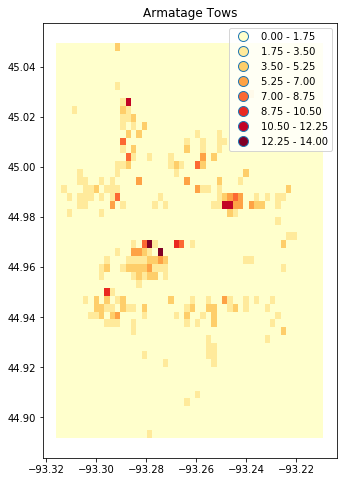

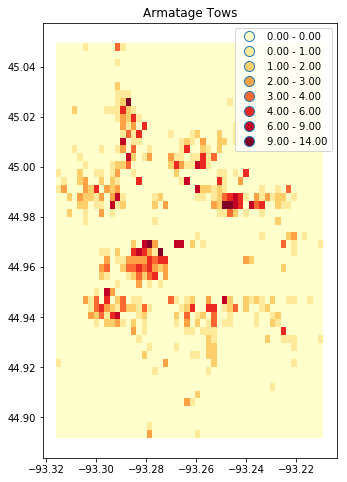

In [57]:
ax = armatage_map.plot(column='count', scheme='equal_interval', k=8, cmap='YlOrRd', legend=True, figsize=(6,8))
ax.set_title("Armatage Tows")
ax = armatage_map.plot(column='count', scheme='fisher_jenks', k=8, cmap='YlOrRd', legend=True, figsize=(6,8))
ax.set_title("Armatage Tows")

(array([2119.,    0.,  166.,    0.,   86.,   76.,   23.,   16.,    9.,
           5.]),
 array([0.        , 0.27080502, 0.54161004, 0.81241506, 1.08322008,
        1.3540251 , 1.62483012, 1.89563514, 2.16644016, 2.43724518,
        2.7080502 ]),
 <a list of 10 Patch objects>)

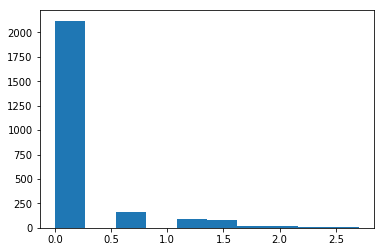

In [58]:
# What does log(x+1) transformation look like?  
plt.hist(np.log1p(armatage_map['count']))

In [47]:
# this is the inverse transformation of the bin edges:
np.expm1(np.array([0.        , 0.32188758, 0.64377516, 0.96566275, 1.28755033,
        1.60943791, 1.93132549, 2.25321308, 2.57510066, 2.89698824,
        3.21887582]))

array([ 0.        ,  0.37972966,  0.90365393,  1.62652781,  2.62389832,
        3.99999999,  5.89864827,  8.51826972, 12.13263902, 17.11949155,
       23.99999988])

(array([98., 28., 21., 20.,  4.,  4.,  8.,  1.,  1.,  3.]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <a list of 10 Patch objects>)

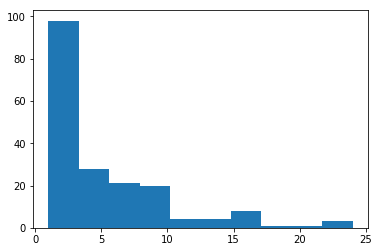

In [49]:
# the histogram with all the zero cells removed
plt.hist(armatage_map.query('count != 0')['count'])

In [50]:
Xerxes_tows = tows[tows.emergency == 'Xerxes']
Xerxes_tows.head()

,emergency,date,address,ward,neighborhood,community,latitude,longitude,other_x,other_y,day,tow_zone
11411,Xerxes,2/24/18,"299 5th ave se,Minneapolis,MN",3.0,Marcy Holmes,University,44.984485,-93.249046,NaN,NaN,1,4.0
11412,Xerxes,2/23/18,"3025 Chicago Ave S,Minneapolis,MN",9.0,Powderhorn Park,Powderhorn,44.947508,-93.262311,NaN,NaN,1,6.0
11413,Xerxes,2/24/18,"620 8th ave se,Minneapolis,MN",3.0,Marcy Holmes,University,44.986318,-93.241708,NaN,NaN,2,4.0
11414,Xerxes,2/23/18,"4145 CHICAGO AVE S,Minneapolis,MN",8.0,Bancroft,Powderhorn,44.927397,-93.262193,NaN,NaN,1,6.0
11415,Xerxes,2/23/18,"4146 Chicago Ave S,Minneapolis,MN",8.0,Bancroft,Powderhorn,44.927287,-93.262498,NaN,NaN,1,6.0


In [53]:
xerxes_map = gpd.GeoDataFrame.from_features(make_choropleth_geojson(Xerxes_tows.longitude, Xerxes_tows.latitude, bins=50))

Text(0.5, 1.0, 'Xerxes Tows')

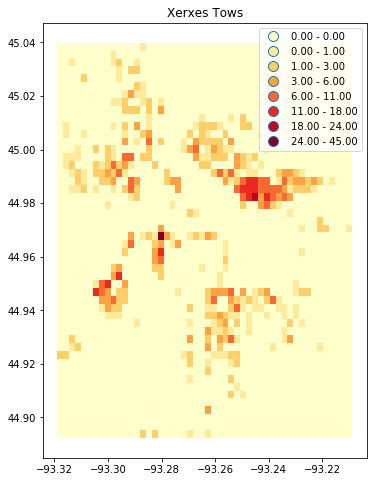

In [54]:
ax = xerxes_map.plot(column='count', scheme='Fisher_Jenks', k=8, cmap='YlOrRd', legend=True, figsize=(6,8))
ax.set_title("Xerxes Tows")

In [65]:
tows.emergency.unique()

array(['Armatage', 'Dana', 'Diamond Lake', 'Ferry', 'Howe', 'Jane',
       'Olive', 'Pembina', 'Quincy', 'Upton', 'Westminster', 'Xerxes',
       'Yale', 'Yardville', 'Grant', 'Polk'], dtype=object)

In [66]:
tows.groupby('emergency')['ward'].count()

emergency
Armatage         948
Dana            1354
Diamond Lake     982
Ferry           1328
Grant              0
Howe             844
Jane            1430
Olive           1161
Pembina          961
Polk               0
Quincy           617
Upton            805
Westminster      980
Xerxes          1215
Yale             894
Yardville        728
Name: ward, dtype: int64

In [67]:
def plot_emergency(tows_df, emergency, bins):
    sub_df = tows_df[tows_df['emergency'] == emergency]
    emergency_map = gpd.GeoDataFrame.from_features(make_choropleth_geojson(sub_df.longitude, sub_df.latitude, bins=bins))
    ax = emergency_map.plot(column='count', scheme='Fisher_Jenks', k=8, cmap='YlOrRd', legend=True, figsize=(6,8))
    ax.set_title(emergency + " Tows")

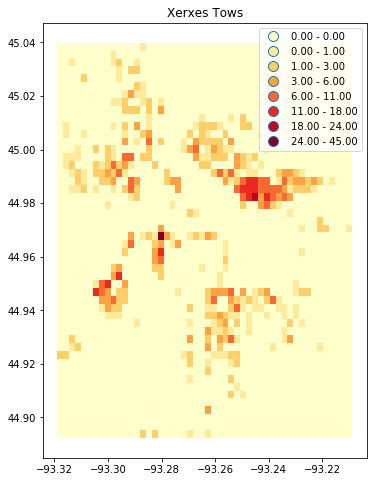

In [68]:
plot_emergency(tows, 'Xerxes', 50)

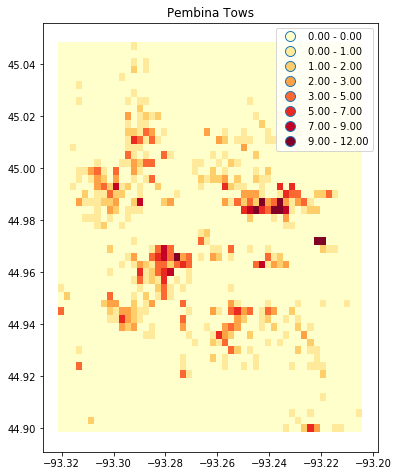

In [69]:
plot_emergency(tows, 'Pembina', 50)

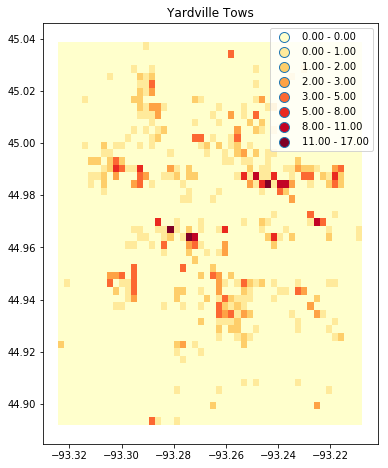

In [70]:
plot_emergency(tows, 'Yardville', 50)

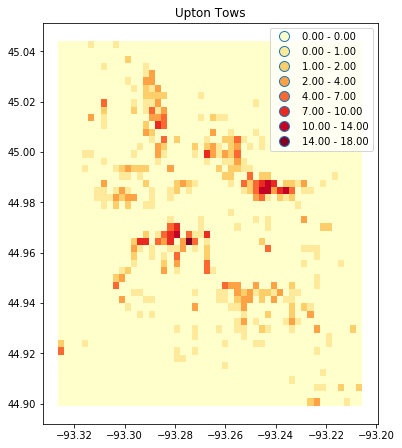

In [71]:
plot_emergency(tows, 'Upton', 50)

In [73]:
def plot_all_emergencies(tows_df, bins):
    # sub_df = tows_df[tows_df['emergency'] == emergency]
    emergency_map = gpd.GeoDataFrame.from_features(make_choropleth_geojson(tows_df.longitude, tows_df.latitude, bins=bins))
    ax = emergency_map.plot(column='count', scheme='Fisher_Jenks', k=8, cmap='YlOrRd', legend=True, figsize=(6,8))
    ax.set_title("Tows for All Emergencies")

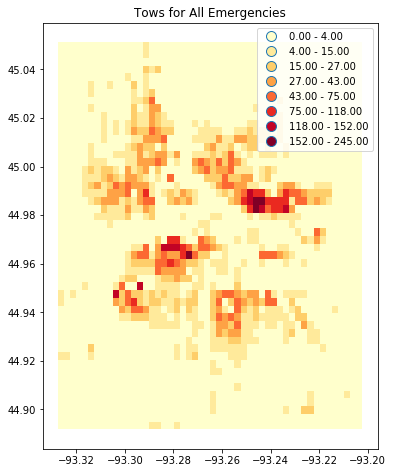

In [74]:
plot_all_emergencies(tows, 50)

In [75]:
# tows.longitude.idxmin()

In [117]:
# tows.iloc[8496]

emergency                             Pembina
date                                  1/23/18
address         1018 GTH ST SE,Minneapolis,MN
ward                                        3
neighborhood                     Marcy Holmes
community                          University
latitude                              45.0084
longitude                            -93.4609
other_x                                   NaN
other_y                                   NaN
day                                         2
tow_zone                                    4
Name: 8496, dtype: object

In [119]:
# tows.drop(8496, inplace=True)

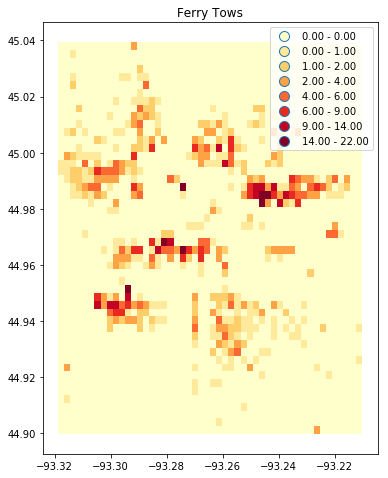

In [76]:
plot_emergency(tows, 'Ferry', 50)

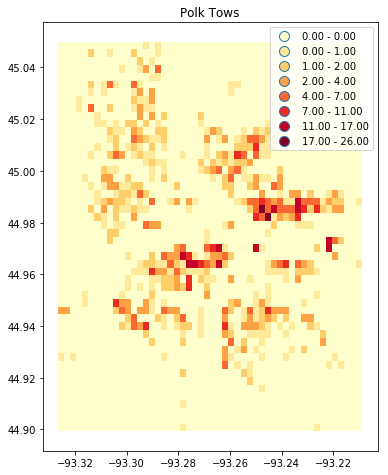

In [78]:
plot_emergency(tows, 'Polk', 50)

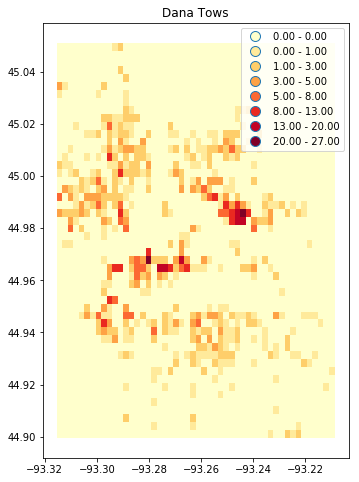

In [79]:
plot_emergency(tows, 'Dana', 50)

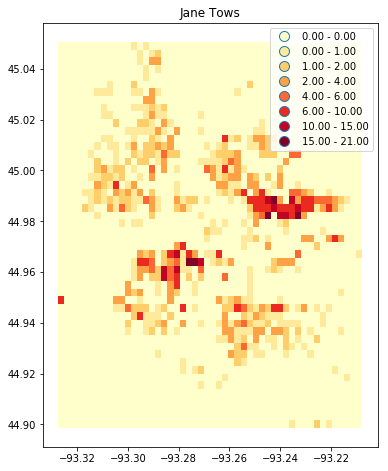

In [80]:
plot_emergency(tows, 'Jane', 50)

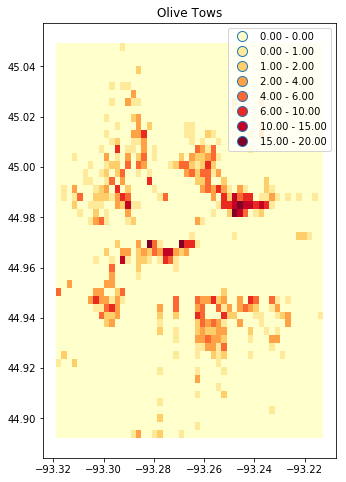

In [81]:
plot_emergency(tows, 'Olive', 50)

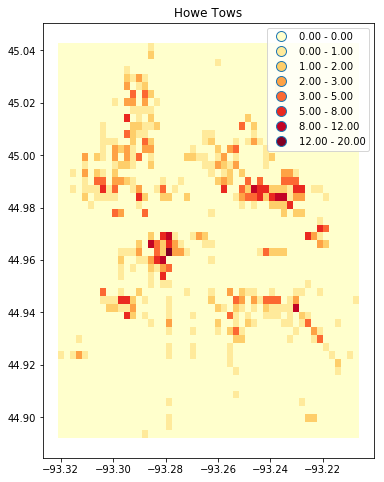

In [82]:
plot_emergency(tows, 'Howe', 50)

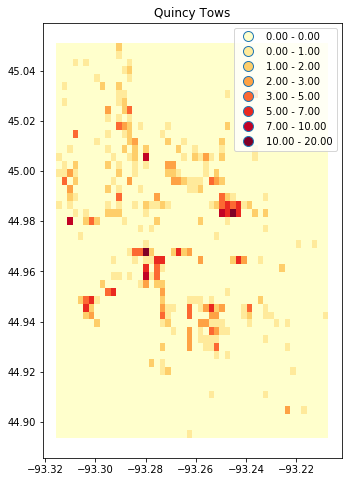

In [83]:
plot_emergency(tows, 'Quincy', 50)

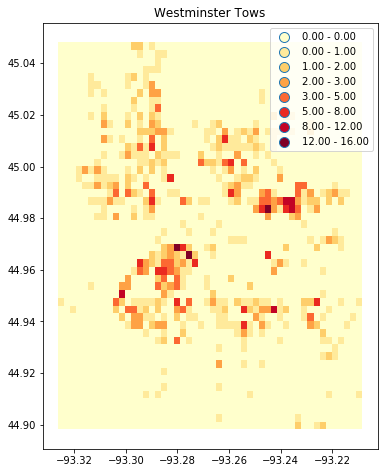

In [84]:
plot_emergency(tows, 'Westminster', 50)

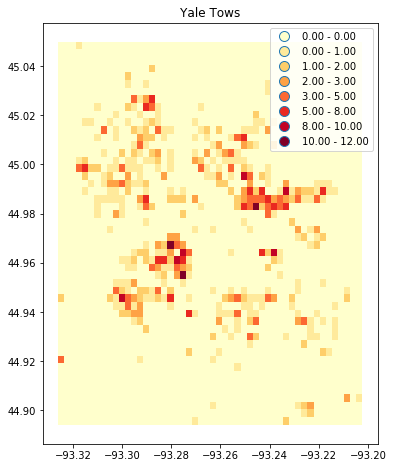

In [85]:
plot_emergency(tows, 'Yale', 50)

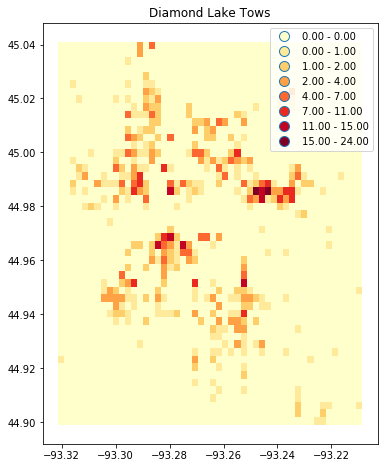

In [86]:
plot_emergency(tows, 'Diamond Lake', 50)

In [ ]:
# Need to clean-up the community variable:
# http://www.minneapolismn.gov/council/maps/index.htm


In [87]:
community = tows.community
community.replace({'Calhoun Isle' : 'Calhoun-Isles', 'Calhoun Isles': 'Calhoun-Isles', 'Near-North': 'Near North'}, inplace=True)
tows.community = community

In [88]:
pd.crosstab(tows.community, tows.emergency, margins=True)

emergency,Armatage,Dana,Diamond Lake,Ferry,Howe,Jane,Olive,Pembina,Quincy,Upton,Westminster,Xerxes,Yale,Yardville,All
community,,,,,,,,,,,,,,,
Calhoun-Isles,102,125,69,196,60,111,124,84,48,51,88,141,80,50,1329
Camden,69,74,53,43,49,80,39,37,52,75,75,47,63,36,792
Central,108,178,136,170,93,146,149,104,82,128,86,110,67,89,1646
Longfellow,34,37,4,23,54,34,21,39,23,33,48,11,55,35,451
Near North,150,291,184,215,151,180,190,169,99,105,152,167,132,87,2272
Nokomis,22,25,35,23,11,13,21,35,14,21,17,37,22,19,315
Northeast,123,158,125,165,73,172,140,71,69,88,128,129,114,86,1641
Phillips,0,23,35,30,1,17,6,2,4,16,14,8,2,19,177
Powderhorn,181,204,144,166,141,281,225,181,140,113,175,204,165,115,2435


In [90]:
import scipy.stats as stats

In [91]:
statistic, pvalue, degrees, _ = stats.chi2_contingency(pd.crosstab(tows.community, tows.emergency))
print(statistic, pvalue, degrees)

822.064657503538 5.60854922227617e-101 130


In [110]:
crosstable = pd.crosstab(tows.community, tows.emergency)

# Correspondence Analysis and producing a bi-plot:

In [93]:
import statsmodels.api as sm
sample_crosstable = sm.stats.Table(pd.crosstab(tows.community, tows.emergency).values)

In [94]:
sample_crosstable.resid_pearson

array([[ 1.43864306, -0.11550156, -2.35531373,  6.46717585, -2.10451562,
        -1.93492744,  1.50522046, -0.59460649, -1.25471268, -2.77131515,
        -0.35647123,  2.59282835, -0.3708061 , -2.16576361],
       [ 2.2368654 , -0.15314226, -0.21332425, -3.58084948,  0.30716816,
         0.0477273 , -3.16965885, -2.23519632,  3.01674506,  4.50484724,
         2.76874928, -2.49423617,  1.88121965, -0.69022342],
       [-0.14629463,  1.72550177,  2.11161842,  1.33921631, -0.45781686,
        -1.48846442,  1.28293232, -0.66611109,  1.25807756,  3.61565039,
        -2.55313532, -2.55703504, -3.56317457,  0.52754163],
       [ 0.72669762, -0.90535039, -4.8182951 , -2.9308499 ,  5.24543704,
        -1.68255457, -2.5867831 ,  1.54645345,  0.80602506,  1.48993849,
         3.0265445 , -4.40607855,  4.98592531,  2.48755482],
       [-0.09785642,  5.11305479,  2.18477764,  0.22898362,  1.40562654,
        -3.16907445,  0.36009243,  1.2681993 ,  0.04602173, -2.06533538,
        -0.34312836, -1.91

In [134]:
# Produce the SVD of the matrix of residuals
u,s,vh = np.linalg.svd(sample_crosstable.resid_pearson, full_matrices=False)

In [135]:
row_scores = np.dot(u, np.diag(np.sqrt(s)))
col_scores = np.dot(vh.T, np.diag(np.sqrt(s)))

In [136]:
rows_df = pd.DataFrame(data=[l[0:2] for l in row_scores], columns=['R1', 'R2'])
rows_df['community'] = crosstable.index
rows_df

,R1,R2,community
0,1.125259,0.625398,Calhoun-Isles
1,-1.515311,-1.151295,Camden
2,0.608264,-1.392426,Central
3,-2.585813,-0.022016,Longfellow
4,0.254952,-1.068604,Near North
5,0.252769,-0.170381,Nokomis
6,0.244094,-0.530922,Northeast
7,1.613438,-1.582982,Phillips
8,-1.015655,0.665282,Powderhorn
9,-0.997205,0.033868,Southwest


In [137]:
cols_df = pd.DataFrame(data = [l[0:2] for l in col_scores], columns=['C1', 'C2'])
cols_df['emergency'] =  crosstable.columns
cols_df

,C1,C2,emergency
0,-1.017294,-0.441929,Armatage
1,0.371317,-1.452368,Dana
2,1.661442,-1.546529,Diamond Lake
3,2.067913,-0.045656,Ferry
4,-1.426672,0.430528,Howe
5,0.197582,1.306612,Jane
6,0.368170,0.304082,Olive
7,-0.330016,0.934980,Pembina
8,-0.884241,-0.843331,Quincy
9,-0.543993,-1.146375,Upton


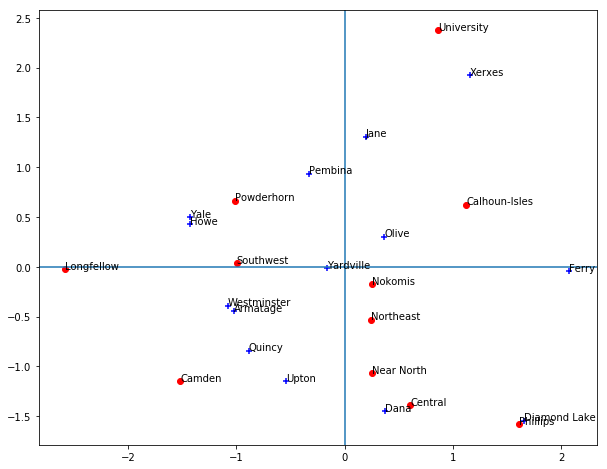

In [138]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1)
ax1.axvline(x=0)
ax1.axhline(y=0)
ax1.scatter(rows_df.R1, rows_df.R2, color='red', marker='o')
for x, y, txt in zip(rows_df.R1, rows_df.R2, rows_df.community):
    ax1.annotate(txt, (x, y))
ax1.scatter(cols_df.C1, cols_df.C2, color='blue', marker='+')
for x, y, txt in zip(cols_df.C1, cols_df.C2, cols_df.emergency):
    ax1.annotate(txt, (x, y))

In [92]:
sampleCrosstab = pd.crosstab(tows.community, tows.emergency).values
grandTotal = np.sum(sampleCrosstab)
correspondenceMatrix = np.divide(sampleCrosstab,grandTotal)
rowTotals = np.sum(correspondenceMatrix, axis=1)
columnTotals = np.sum(correspondenceMatrix, axis=0)
 
independenceModel = np.outer(rowTotals, columnTotals)
 
#Calculate manually
chiSquaredStatistic = grandTotal*np.sum(np.square(correspondenceMatrix-independenceModel)/independenceModel)
print(chiSquaredStatistic)
 
# Quick check - compare to scipy Chi-Squared test
statistic, prob, dof, ex = stats.chi2_contingency(sampleCrosstab)
print(statistic)
print(np.round(prob, decimals=2))

822.0646575035379
822.064657503538
0.0


In [147]:
# pre-calculate normalised rows
norm_correspondenceMatrix = np.divide(correspondenceMatrix,rowTotals[:, None])
 
chiSquaredDistances = np.zeros((correspondenceMatrix.shape[0],correspondenceMatrix.shape[0]))
 
norm_columnTotals = np.sum(norm_correspondenceMatrix, axis=0)
for row in range(correspondenceMatrix.shape[0]):
    chiSquaredDistances[row]=np.sqrt(np.sum(np.square(norm_correspondenceMatrix
                                                        -norm_correspondenceMatrix[row])/columnTotals, axis=1))
# Save distances to the DataFrame
dfchiSquaredDistances = pd.DataFrame(data=np.round(chiSquaredDistances*100).astype(int))
 
print(dfchiSquaredDistances)

    0   1   2    3   4   5   6    7   8    9   10
0    0  50  32   69  29  45  25   87  32   62  31
1   50   0  36   47  38  50  32   89  32   54  45
2   32  36   0   63  20  39  23   73  28   57  32
3   69  47  63    0  59  70  60  116  53   51  62
4   29  38  20   59   0  38  23   81  25   57  32
5   45  50  39   70  38   0  42   84  41   66  41
6   25  32  23   60  23  42   0   77  21   55  28
7   87  89  73  116  81  84  77    0  92  111  84
8   32  32  28   53  25  41  21   92   0   53  26
9   62  54  57   51  57  66  55  111  53    0  59
10  31  45  32   62  32  41  28   84  26   59   0


In [148]:
standardizedResiduals = np.divide((correspondenceMatrix-independenceModel),np.sqrt(independenceModel))
 
u,s,vh = np.linalg.svd(standardizedResiduals, full_matrices=False)

In [150]:
deltaR = np.diag(np.divide(1.0,np.sqrt(rowTotals)))
 
rowScores=np.dot(np.dot(deltaR,u),np.diag(s))
 
dfFirstTwoComponents = pd.DataFrame(data=[l[0:2] for l in rowScores], columns=['X', 'Y'])
 
print(dfFirstTwoComponents)

           X         Y
0   0.121120  0.068661
1  -0.212064 -0.158799
2   0.063429 -0.125542
3  -0.491233 -0.016738
4   0.022415 -0.081604
5   0.062158 -0.032088
6   0.025467 -0.048394
7   0.518267 -0.438487
8  -0.084692  0.047879
9  -0.305163  0.005022
10  0.059630  0.160513


In [151]:
import matplotlib.pyplot as plt

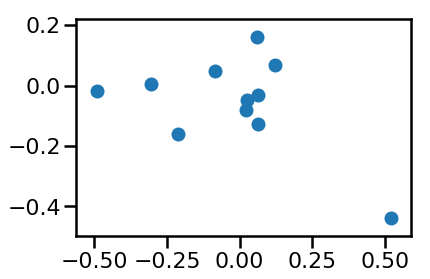

In [179]:
plt.scatter(dfFirstTwoComponents.X, dfFirstTwoComponents.Y)

In [153]:
import numpy as np

In [155]:
pd.crosstab?

In [156]:
import seaborn as sns

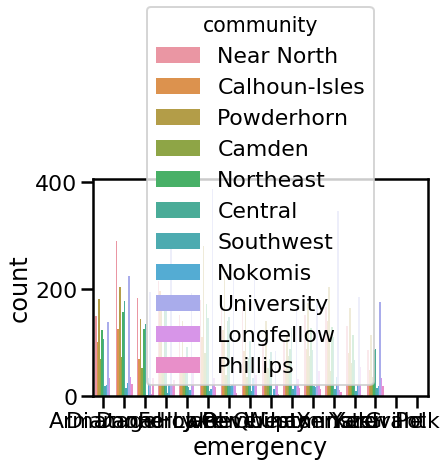

In [165]:
sns.countplot(x=tows.emergency, hue=tows.community)

In [180]:
sns.set_context("paper")

In [183]:
%matplotlib inline

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
%matplotlib notebook

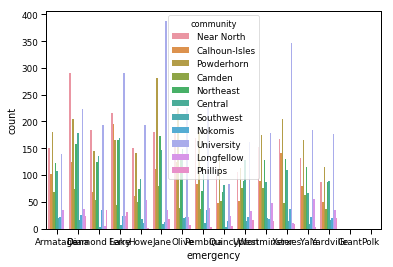

In [184]:
sns.countplot(x=tows.emergency, hue=tows.community)

In [185]:
sampleCrosstab

array([[102, 125,  69, 196,  60, 111, 124,  84,  48,  51,  88, 141,  80,
         50],
       [ 69,  74,  53,  43,  49,  80,  39,  37,  52,  75,  75,  47,  63,
         36],
       [108, 178, 136, 170,  93, 146, 149, 104,  82, 128,  86, 110,  67,
         89],
       [ 34,  37,   4,  23,  54,  34,  21,  39,  23,  33,  48,  11,  55,
         35],
       [150, 291, 184, 215, 151, 180, 190, 169,  99, 105, 152, 167, 132,
         87],
       [ 22,  25,  35,  23,  11,  13,  21,  35,  14,  21,  17,  37,  22,
         19],
       [123, 158, 125, 165,  73, 172, 140,  71,  69,  88, 128, 129, 114,
         86],
       [  0,  23,  35,  30,   1,  17,   6,   2,   4,  16,  14,   8,   2,
         19],
       [181, 204, 144, 166, 141, 281, 225, 181, 140, 113, 175, 204, 165,
        115],
       [ 20,  15,   3,   6,  18,   9,  20,  10,   2,  14,  19,  14,   9,
         16],
       [139, 224, 194, 291, 193, 387, 226, 229,  84, 161, 178, 347, 185,
        176]], dtype=int64)

In [186]:
xtabs = pd.crosstab(tows.emergency, tows.community)
xtabs

community,Calhoun-Isles,Camden,Central,Longfellow,Near North,Nokomis,Northeast,Phillips,Powderhorn,Southwest,University
emergency,,,,,,,,,,,
Armatage,102,69,108,34,150,22,123,0,181,20,139
Dana,125,74,178,37,291,25,158,23,204,15,224
Diamond Lake,69,53,136,4,184,35,125,35,144,3,194
Ferry,196,43,170,23,215,23,165,30,166,6,291
Howe,60,49,93,54,151,11,73,1,141,18,193
Jane,111,80,146,34,180,13,172,17,281,9,387
Olive,124,39,149,21,190,21,140,6,225,20,226
Pembina,84,37,104,39,169,35,71,2,181,10,229
Quincy,48,52,82,23,99,14,69,4,140,2,84


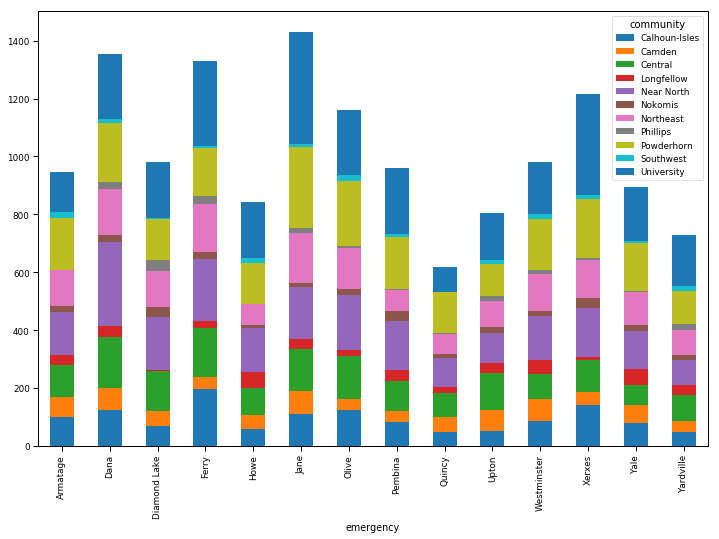

In [190]:
xtabs.plot(kind='bar',stacked='True', figsize=(12,8))

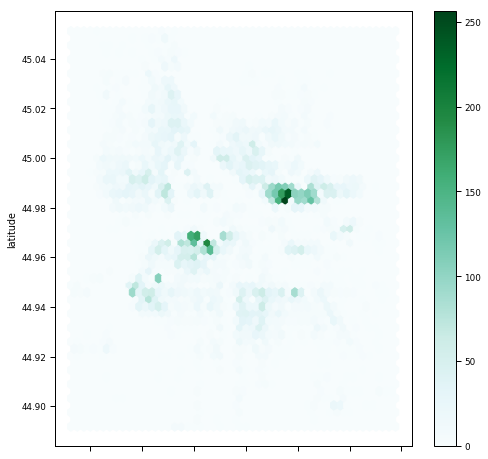

In [199]:
tows.plot.hexbin('longitude', 'latitude', gridsize=50, figsize=(8,8))

In [197]:
tows.plot.hexbin?

In [37]:
armatage_map.plot?

In [139]:
np.expm1(np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]))

array([ 0.        ,  0.64872127,  1.71828183,  3.48168907,  6.3890561 ,
       11.18249396, 19.08553692, 32.11545196, 53.59815003])

In [140]:
np.linspace(0, 3.5, 0.75)

C:\Users\dadra\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


array([], dtype=float64)

In [141]:
np.linspace?

In [143]:
np.expm1(np.linspace(0.75, 3.75, 10))

array([ 1.11700002,  1.95451153,  3.123353  ,  4.75460268,  7.031195  ,
       10.20843552, 14.64263188, 20.83105142, 29.46768661, 41.521082  ])

In [150]:
crosstable.columns.tolist()

['Armatage',
 'Dana',
 'Diamond Lake',
 'Ferry',
 'Howe',
 'Jane',
 'Olive',
 'Pembina',
 'Quincy',
 'Upton',
 'Westminster',
 'Xerxes',
 'Yale',
 'Yardville']